# Clustering


**Problem Statement:**

For the following dataset, perform the clustering:

17 28 50 60 80 89 150 167 171 189

**Task Breakdown:**

Step 1: Use the K-means algorithm with K=3 to cluster the given data.

Step 2: Determine the final clusters after 3 iterations, given that K=3 and the initial centers are 150, 171, and 189.

Step 3: Use hierarchical agglomerative clustering with the centroid method to cluster the data.

Step 4: Use hierarchical agglomerative clustering with the single linkage method to cluster the data.

Step 5: Use hierarchical agglomerative clustering with the complete linkage method to cluster the data.

**Summary:**

The differences between Single Link and Complete Link in this case:

With single link, cluster "150167171" merges with "189" prior than cluster "5060" merges with "8090". While with complete link, these two merge at the same time.


In [ ]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1. Use the K-means algorithm with K= 3 to cluster the data.

In [ ]:
List=[17, 28, 50, 60, 80, 89, 150, 167, 171, 189]
data = np.array(List)
k=3

In [ ]:
# initiate cluster centers randomly
import random
u=random.sample(List, k)
u.sort()
print("Initial cluster centers: ")
print(u)

# or manually, for example:
# u_initial=[17,50,60]
# print("Initial cluster centers: ")
# print(u_initial)
# u=u_initial

Initial cluster centers: 
[28, 80, 189]


In [ ]:
# compute distance of each number to initial centers
distance={}
for i in u:
   distance[i] = abs(data-i)
distance

{28: array([ 11,   0,  22,  32,  52,  61, 122, 139, 143, 161]),
 80: array([ 63,  52,  30,  20,   0,   9,  70,  87,  91, 109]),
 189: array([172, 161, 139, 129, 109, 100,  39,  22,  18,   0])}

In [ ]:
# convert output from dictionary to dataframe for virtualization purpose
df=pd.DataFrame.from_dict(distance, orient='index',
                       columns=data)
df

17   28   50   60   80   89   150  167  171  189
28    11    0   22   32   52   61  122  139  143  161
80    63   52   30   20    0    9   70   87   91  109
189  172  161  139  129  109  100   39   22   18    0

In [ ]:
# for each data point, assign it to the cluster such that the distance between it and the cluster center is minimal

# initializing dict with lists
cluster={}
[cluster.setdefault(x, []) for x in range(k)]

# creating a list of dataframe columns
columns = list(df)
for i in columns:
  if df[i].idxmin() == u[0]:
     cluster[0].append(i)
  elif df[i].idxmin() == u[1]:
    cluster[1].append(i)
  else:
    cluster[2].append(i)

print("After the first assignment, cluster: " + str(dict(cluster)))

After the first assignment, cluster: {0: [17, 28, 50], 1: [60, 80, 89], 2: [150, 167, 171, 189]}


In [ ]:
# for each cluster, update the cluster center
u[0]=np.mean(cluster.get(0))
u[1]=np.mean(cluster.get(1))
u[2]=np.mean(cluster.get(2))
print("Updated cluster centers:")
print(u)

Updated cluster centers:
[31.666666666666668, 76.33333333333333, 169.25]


In [ ]:
# start the second loop of above steps

distance={}
for i in u:
   distance[i] = abs(data-i)
df=pd.DataFrame.from_dict(distance, orient='index', columns=data)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
# initializing dict with lists
cluster={}
[cluster.setdefault(x, []) for x in range(3)]
# creating a list of dataframe columns
columns = list(df)
for i in columns:
  if df[i].idxmin() == u[0]:
     cluster[0].append(i)
  elif df[i].idxmin() == u[1]:
    cluster[1].append(i)
  else:
    cluster[2].append(i)
print("After the second assignment, cluster: " + str(dict(cluster)))
u[0]=np.mean(cluster.get(0))
u[1]=np.mean(cluster.get(1))
u[2]=np.mean(cluster.get(2))
print("Updated cluster centers:")
print(u)

                   17          28          50          60         80   \
31.666667    14.666667    3.666667   18.333333   28.333333  48.333333   
76.333333    59.333333   48.333333   26.333333   16.333333   3.666667   
169.250000  152.250000  141.250000  119.250000  109.250000  89.250000   

                  89          150         167         171         189  
31.666667   57.333333  118.333333  135.333333  139.333333  157.333333  
76.333333   12.666667   73.666667   90.666667   94.666667  112.666667  
169.250000  80.250000   19.250000    2.250000    1.750000   19.750000  
After the second assignment, cluster: {0: [17, 28, 50], 1: [60, 80, 89], 2: [150, 167, 171, 189]}
Updated cluster centers:
[31.666666666666668, 76.33333333333333, 169.25]


In [ ]:
# start the third loop of above step
distance={}
for i in u:
   distance[i] = abs(data-i)
df=pd.DataFrame.from_dict(distance, orient='index', columns=data)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
# initializing dict with lists
cluster={}
[cluster.setdefault(x, []) for x in range(3)]

# creating a list of dataframe columns
columns = list(df)
for i in columns:
  if df[i].idxmin() == u[0]:
     cluster[0].append(i)
  elif df[i].idxmin() == u[1]:
    cluster[1].append(i)
  else:
    cluster[2].append(i)

print("After the third assignment, cluster: " + str(dict(cluster)))
u[0]=np.mean(cluster.get(0))
u[1]=np.mean(cluster.get(1))
u[2]=np.mean(cluster.get(2))
print("Updated cluster centers:")
print(u)

                   17          28          50          60         80   \
31.666667    14.666667    3.666667   18.333333   28.333333  48.333333   
76.333333    59.333333   48.333333   26.333333   16.333333   3.666667   
169.250000  152.250000  141.250000  119.250000  109.250000  89.250000   

                  89          150         167         171         189  
31.666667   57.333333  118.333333  135.333333  139.333333  157.333333  
76.333333   12.666667   73.666667   90.666667   94.666667  112.666667  
169.250000  80.250000   19.250000    2.250000    1.750000   19.750000  
After the third assignment, cluster: {0: [17, 28, 50], 1: [60, 80, 89], 2: [150, 167, 171, 189]}
Updated cluster centers:
[31.666666666666668, 76.33333333333333, 169.25]


In [ ]:
print("It is not changing(convergence) after 3 iterations. The K-means clustering result is ")
print(str(dict(cluster)))

It is not changing(convergence) after 3 iterations. The K-means clustering result is 
{0: [17, 28, 50], 1: [60, 80, 89], 2: [150, 167, 171, 189]}


Different starting numbers(cluster centers) can lead to different clustering results in our example, which resonates that K-means is very sensitive to initial conditions. The solution is to run multiple trials and choose one with the best SSE. I will further explore this in a seperate notebook.

Using the default KMeans algorithm, the result is:

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0).fit(data.reshape(-1,1))
kmeans.predict(data.reshape(-1,1))

array([2, 2, 2, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

#2. For K-means, what will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189?

In [ ]:
data = np.array([17, 28, 50, 60, 80, 89, 150, 167, 171, 189])
k=3
u=[150,171,189]

for j in range(k):
  distance={}
  for i in u:
    distance[i] = abs(data-i)
  df=pd.DataFrame.from_dict(distance, orient='index', columns=data)
  pd.set_option("display.max_rows", None, "display.max_columns", None)
  print(df)
  # initializing dict with lists
  cluster={}
  [cluster.setdefault(x, []) for x in range(3)]
  # creating a list of dataframe columns
  columns = list(df)
  for i in columns:
    if df[i].idxmin() == u[0]:
      cluster[0].append(i)
    elif df[i].idxmin() == u[1]:
      cluster[1].append(i)
    else:
      cluster[2].append(i)
  print("After the assignment, cluster: " + str(dict(cluster)))
  u[0]=np.mean(cluster.get(0))
  u[1]=np.mean(cluster.get(1))
  u[2]=np.mean(cluster.get(2))
  print("Updated cluster centers:")
  print(u)

     17   28   50   60   80   89   150  167  171  189
150  133  122  100   90   70   61    0   17   21   39
171  154  143  121  111   91   82   21    4    0   18
189  172  161  139  129  109  100   39   22   18    0
After the assignment, cluster: {0: [17, 28, 50, 60, 80, 89, 150], 1: [167, 171], 2: [189]}
Updated cluster centers:
[67.71428571428571, 169.0, 189.0]
                   17          28          50          60          80   \
67.714286    50.714286   39.714286   17.714286    7.714286   12.285714   
169.000000  152.000000  141.000000  119.000000  109.000000   89.000000   
189.000000  172.000000  161.000000  139.000000  129.000000  109.000000   

                   89         150        167         171         189  
67.714286    21.285714  82.285714  99.285714  103.285714  121.285714  
169.000000   80.000000  19.000000   2.000000    2.000000   20.000000  
189.000000  100.000000  39.000000  22.000000   18.000000    0.000000  
After the assignment, cluster: {0: [17, 28, 50, 60, 8

# 3.  Use hierarchical agglomerative clustering with centroids method to cluster the data.

In [ ]:
data = np.array([17, 28, 50, 60, 80, 89, 150, 167, 171, 189])
c={}
proximity={}
for i in data:
   proximity[i] = abs(data-i)
proximity

{17: array([  0,  11,  33,  43,  63,  72, 133, 150, 154, 172]),
 28: array([ 11,   0,  22,  32,  52,  61, 122, 139, 143, 161]),
 50: array([ 33,  22,   0,  10,  30,  39, 100, 117, 121, 139]),
 60: array([ 43,  32,  10,   0,  20,  29,  90, 107, 111, 129]),
 80: array([ 63,  52,  30,  20,   0,   9,  70,  87,  91, 109]),
 89: array([ 72,  61,  39,  29,   9,   0,  61,  78,  82, 100]),
 150: array([133, 122, 100,  90,  70,  61,   0,  17,  21,  39]),
 167: array([150, 139, 117, 107,  87,  78,  17,   0,   4,  22]),
 171: array([154, 143, 121, 111,  91,  82,  21,   4,   0,  18]),
 189: array([172, 161, 139, 129, 109, 100,  39,  22,  18,   0])}

In [ ]:
proximity_matrix=pd.DataFrame.from_dict(proximity, orient='index',
                       columns=data)
proximity_matrix

17   28   50   60   80   89   150  167  171  189
17     0   11   33   43   63   72  133  150  154  172
28    11    0   22   32   52   61  122  139  143  161
50    33   22    0   10   30   39  100  117  121  139
60    43   32   10    0   20   29   90  107  111  129
80    63   52   30   20    0    9   70   87   91  109
89    72   61   39   29    9    0   61   78   82  100
150  133  122  100   90   70   61    0   17   21   39
167  150  139  117  107   87   78   17    0    4   22
171  154  143  121  111   91   82   21    4    0   18
189  172  161  139  129  109  100   39   22   18    0

In [ ]:
centroids=np.triu(proximity_matrix,k=0)
centroids

array([[  0,  11,  33,  43,  63,  72, 133, 150, 154, 172],
       [  0,   0,  22,  32,  52,  61, 122, 139, 143, 161],
       [  0,   0,   0,  10,  30,  39, 100, 117, 121, 139],
       [  0,   0,   0,   0,  20,  29,  90, 107, 111, 129],
       [  0,   0,   0,   0,   0,   9,  70,  87,  91, 109],
       [  0,   0,   0,   0,   0,   0,  61,  78,  82, 100],
       [  0,   0,   0,   0,   0,   0,   0,  17,  21,  39],
       [  0,   0,   0,   0,   0,   0,   0,   0,   4,  22],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  18],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [ ]:
minval = np.min(centroids[np.nonzero(centroids)])
maxval = np.max(centroids[np.nonzero(centroids)])
print("Minimum Values: ", minval)
print("Maximum Values: ", maxval)

Minimum Values:  4
Maximum Values:  172


In [ ]:
# find index of the minimal value
# index=np.where(centroids == minval)
index=np.argwhere(centroids == minval)
print(index)
a=np.delete(data,index)
a=np.insert(a, index[0][0], np.mean(data[index]))
print("Updated list: ", a)
c[0]=data[index[0]].tolist()
c

[[7 8]]
Updated list:  [ 17  28  50  60  80  89 150 169 189]


{0: [167, 171]}

In [ ]:
# If there are two or more exact same minimum numbers in a distance matrix, the above code should be replaced with below.

"""
index=np.argwhere(centroids == minval)
index=index[::-1]
print(index)
for row in range(len(index)):
  a=np.delete(data,index[row])
  a=np.insert(a, index[row][0], np.mean(data[index[row]]))
  print(a)
  list=data[index[row]]
  list=list.tolist()
  if 0 in c:
    c[0].append(list)
  else:
    c[0]=list
  print(c)
  data=a

"""

'\nindex=np.argwhere(centroids == minval)\nindex=index[::-1]\nprint(index)\nfor row in range(len(index)):\n  a=np.delete(data,index[row])\n  a=np.insert(a, index[row][0], np.mean(data[index[row]]))\n  print(a)\n  list=data[index[row]]\n  list=list.tolist()\n  if 0 in c:\n    c[0].append(list)\n  else:\n    c[0]=list\n  print(c)\n  data=a\n\n'

As now it will start again with the updated list [ 17  28  50  60  80  89 150 169 189]. We will use a for loop for iterations.

In [ ]:
data = np.array([17, 28, 50, 60, 80, 89, 150, 167, 171, 189])

# Initiate clusters
c={}

# Agglomerative Clustering is a bottom up approach, so the maximum number of clusters is the number of data points.
for j in range(len(data)):
  # when there is only one element left in the data list, stop the iteration
  if len(data)>1:
    # proximity_matrix
    proximity={}
    for i in data:
      proximity[i] = abs(data-i)
    proximity_matrix=pd.DataFrame.from_dict(proximity, orient='index', columns=data)
    centroids=np.triu(proximity_matrix,k=0)
    print("Centroids Method Distance Matrix: ")
    print(centroids)
    # find minimum value in the distance matrix
    minval = np.min(centroids[np.nonzero(centroids)])
    # get index of minimum value
    index=np.argwhere(centroids == minval)
    # merge two clusters
    a=np.delete(data,index)
    a=np.insert(a, index[0][0], np.mean(data[index]))
    print("Updated list: ", a)

    c[j]=data[index[0]].tolist()
    print("Hierarchical Clustering ", c)
    data=a
  else:
    break

Centroids Method Distance Matrix: 
[[  0  11  33  43  63  72 133 150 154 172]
 [  0   0  22  32  52  61 122 139 143 161]
 [  0   0   0  10  30  39 100 117 121 139]
 [  0   0   0   0  20  29  90 107 111 129]
 [  0   0   0   0   0   9  70  87  91 109]
 [  0   0   0   0   0   0  61  78  82 100]
 [  0   0   0   0   0   0   0  17  21  39]
 [  0   0   0   0   0   0   0   0   4  22]
 [  0   0   0   0   0   0   0   0   0  18]
 [  0   0   0   0   0   0   0   0   0   0]]
Updated list:  [ 17  28  50  60  80  89 150 169 189]
Hierarchical Clustering  {0: [167, 171]}
Centroids Method Distance Matrix: 
[[  0  11  33  43  63  72 133 152 172]
 [  0   0  22  32  52  61 122 141 161]
 [  0   0   0  10  30  39 100 119 139]
 [  0   0   0   0  20  29  90 109 129]
 [  0   0   0   0   0   9  70  89 109]
 [  0   0   0   0   0   0  61  80 100]
 [  0   0   0   0   0   0   0  19  39]
 [  0   0   0   0   0   0   0   0  20]
 [  0   0   0   0   0   0   0   0   0]]
Updated list:  [ 17  28  50  60  84 150 169 189]
Hier

Based on the result above:

{0: [167, 171], 1: [80, 89], 2: [50, 60], 3: [17, 28], 4: [150, 169], 5: [55, 84], 6: [159, 189], 7: [22, 69], 8: [45, 174]}

The cluster diagram can be drawn:

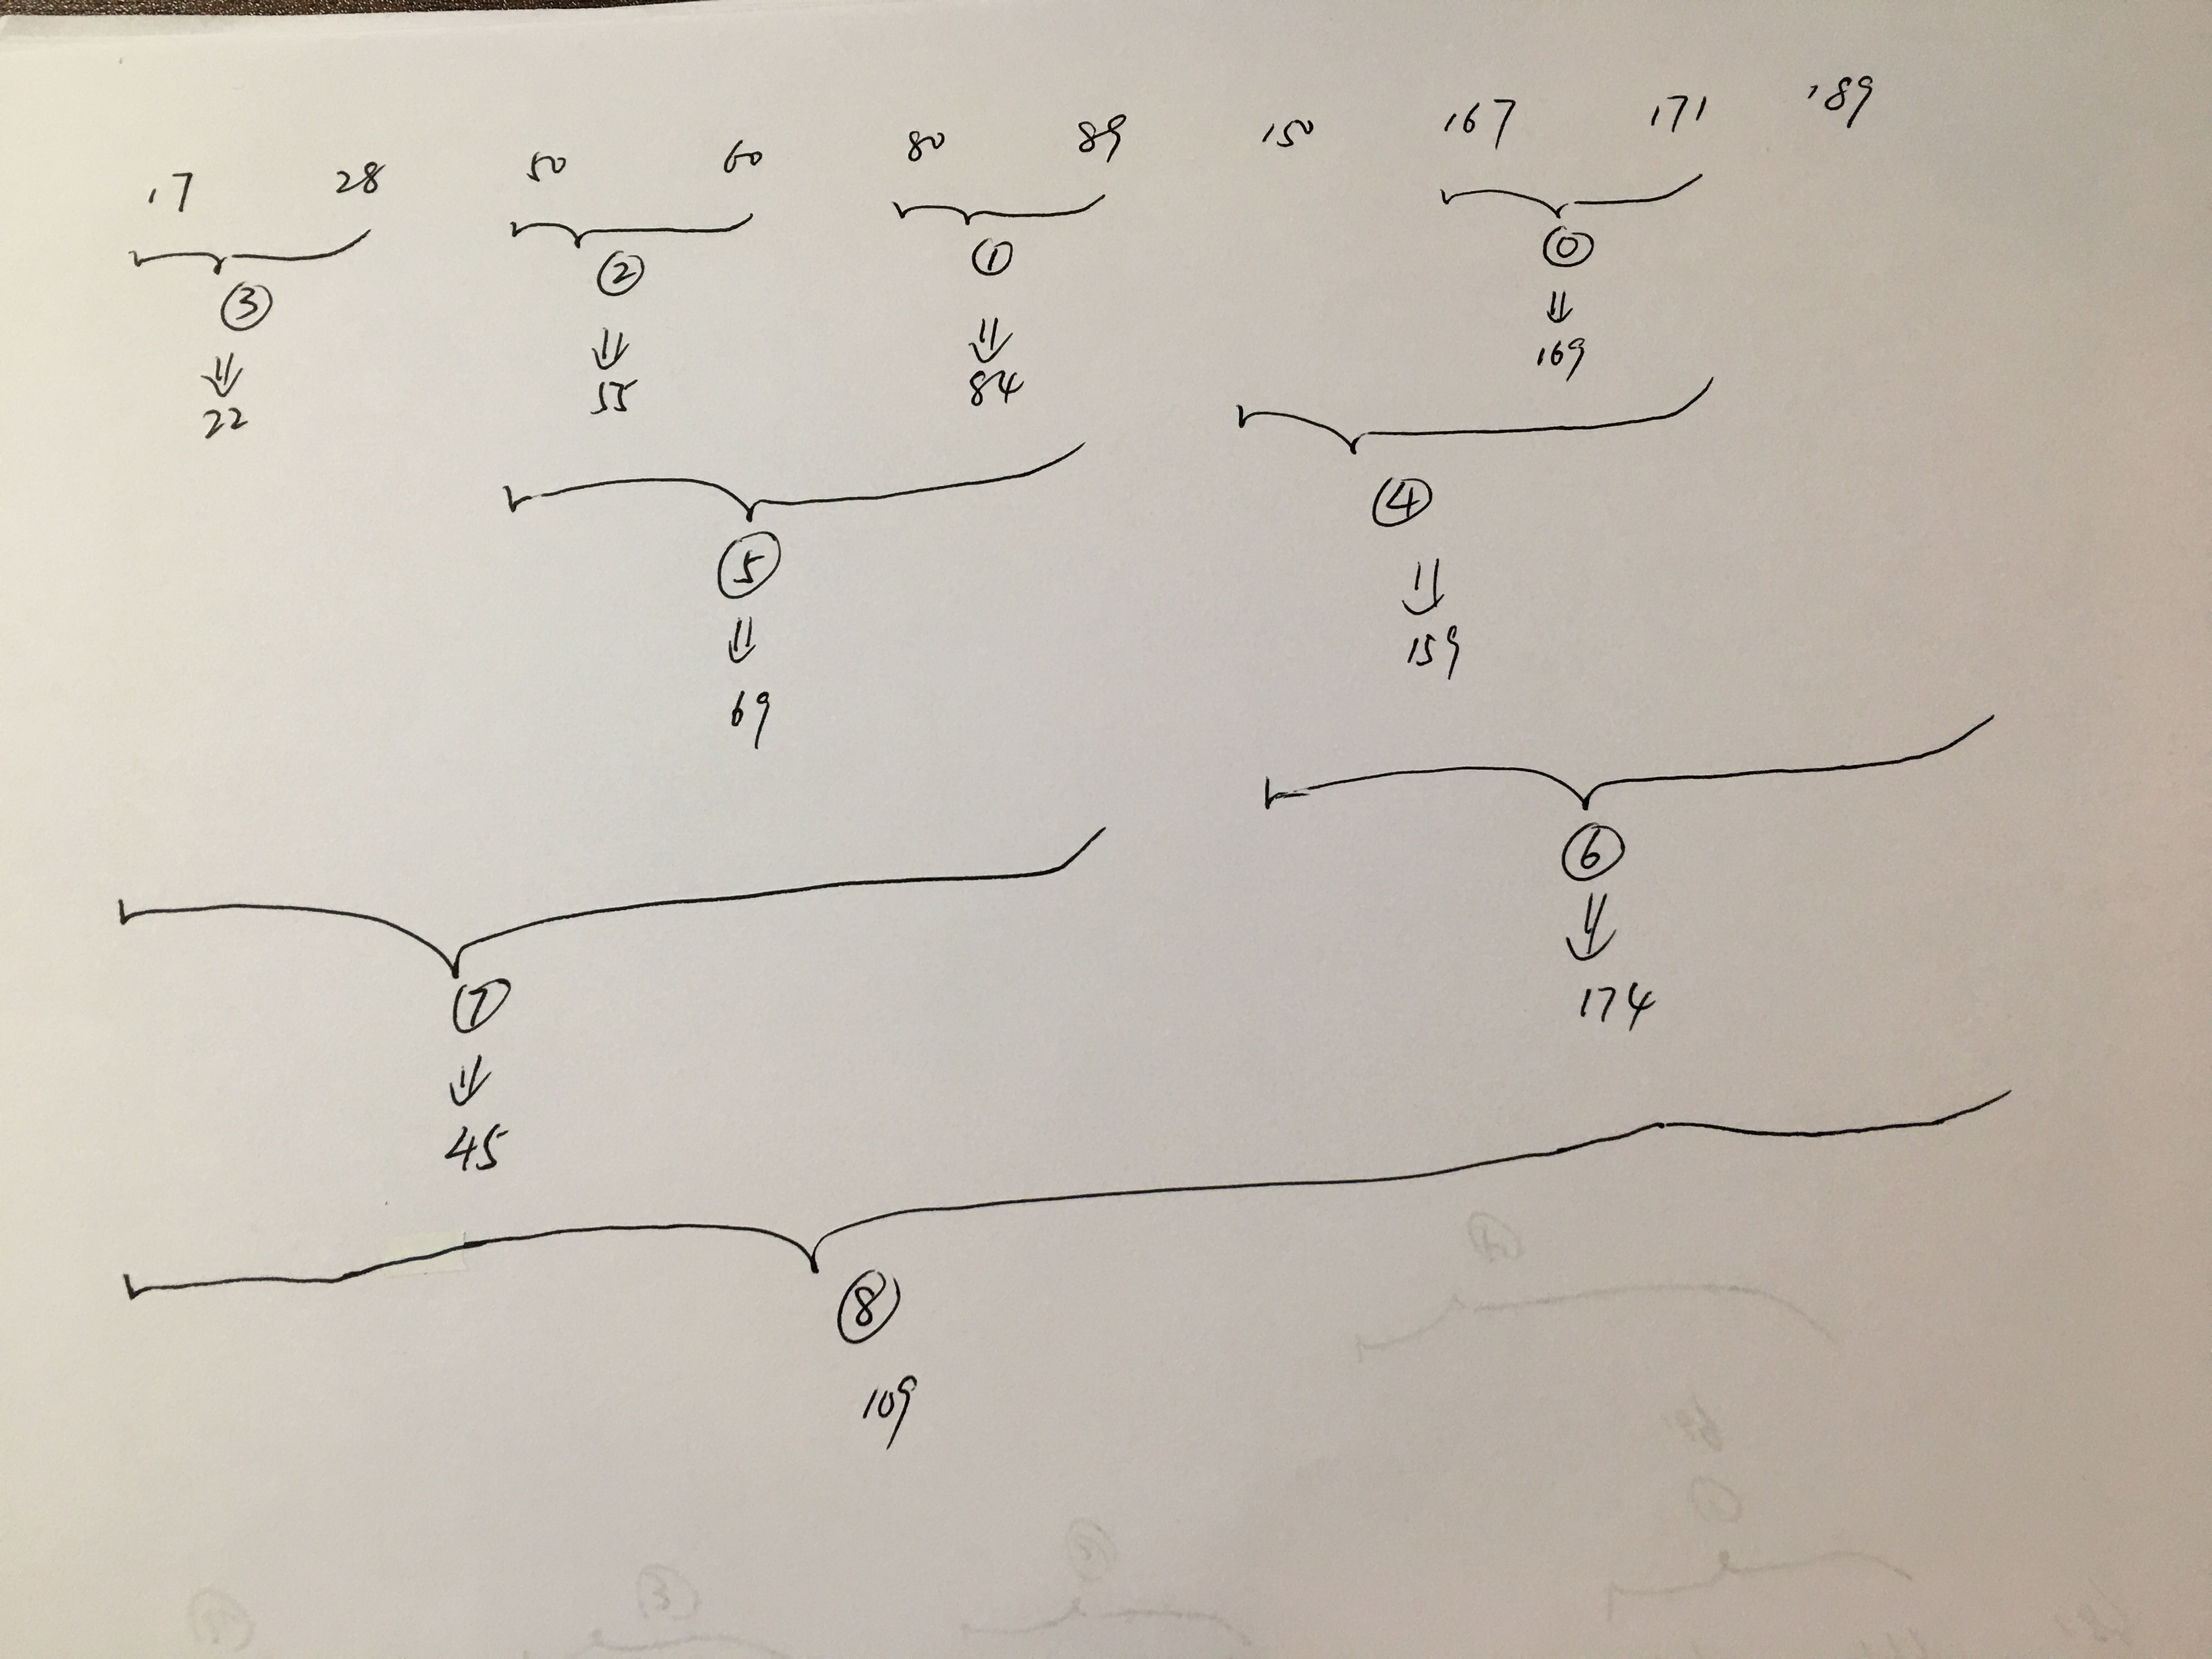

#4. Use hierarchical agglomerative clustering with Single link to cluster the data.

In [ ]:
data = np.array([17, 28, 50, 60, 80, 89, 150, 167, 171, 189])
c={}
proximity={}

for i in data:
  proximity[i] = abs(data-i)
proximity_matrix=pd.DataFrame.from_dict(proximity, orient='index', columns=data)
single_link=np.triu(proximity_matrix,k=0)
print(single_link)

# convert data to string type, so that concatenating numbers will not exceed range
data_str=data.astype(str)

for j in range(len(data_str)):
  # when there is only one element left in the data list, stop the iteration
  if len(single_link)>1:
    # get index of minimum value in distance matrix
    minval = np.min(single_link[np.nonzero(single_link)])
    index=np.argwhere(single_link == minval)
    # update list
    a=np.delete(data_str,index)
    a=np.insert(a, index[0][0], data_str[index[0][0]]+data_str[index[0][1]])
    print("Updated list: ", a)
    # update cluster
    c[j]=data_str[index[0]].tolist()
    print("Hierarchical Clustering ", c)
    # update single link distance matrix
    single_link=np.delete(single_link, index[0][1], 1)
    single_link=np.delete(single_link, index[0][0], 0)
    print("Single Link Distance matrix: ")
    print(single_link)
    # assign updated list to variable data
    data_str=a
  else:
    break

[[  0  11  33  43  63  72 133 150 154 172]
 [  0   0  22  32  52  61 122 139 143 161]
 [  0   0   0  10  30  39 100 117 121 139]
 [  0   0   0   0  20  29  90 107 111 129]
 [  0   0   0   0   0   9  70  87  91 109]
 [  0   0   0   0   0   0  61  78  82 100]
 [  0   0   0   0   0   0   0  17  21  39]
 [  0   0   0   0   0   0   0   0   4  22]
 [  0   0   0   0   0   0   0   0   0  18]
 [  0   0   0   0   0   0   0   0   0   0]]
Updated list:  ['17' '28' '50' '60' '80' '89' '150' '167171' '189']
Hierarchical Clustering  {0: ['167', '171']}
Single Link Distance matrix: 
[[  0  11  33  43  63  72 133 150 172]
 [  0   0  22  32  52  61 122 139 161]
 [  0   0   0  10  30  39 100 117 139]
 [  0   0   0   0  20  29  90 107 129]
 [  0   0   0   0   0   9  70  87 109]
 [  0   0   0   0   0   0  61  78 100]
 [  0   0   0   0   0   0   0  17  39]
 [  0   0   0   0   0   0   0   0  18]
 [  0   0   0   0   0   0   0   0   0]]
Updated list:  ['17' '28' '50' '60' '8089' '150' '167171' '189']
Hierarchi

Based on the result above:

{0: ['167', '171'], 1: ['80', '89'], 2: ['50', '60'], 3: ['17', '28'], 4: ['150', '167171'], 5: ['150167171', '189'], 6: ['5060', '8089'], 7: ['1728', '50608089'], 8: ['172850608089', '150167171189']}

The cluster diagram can be drawn:

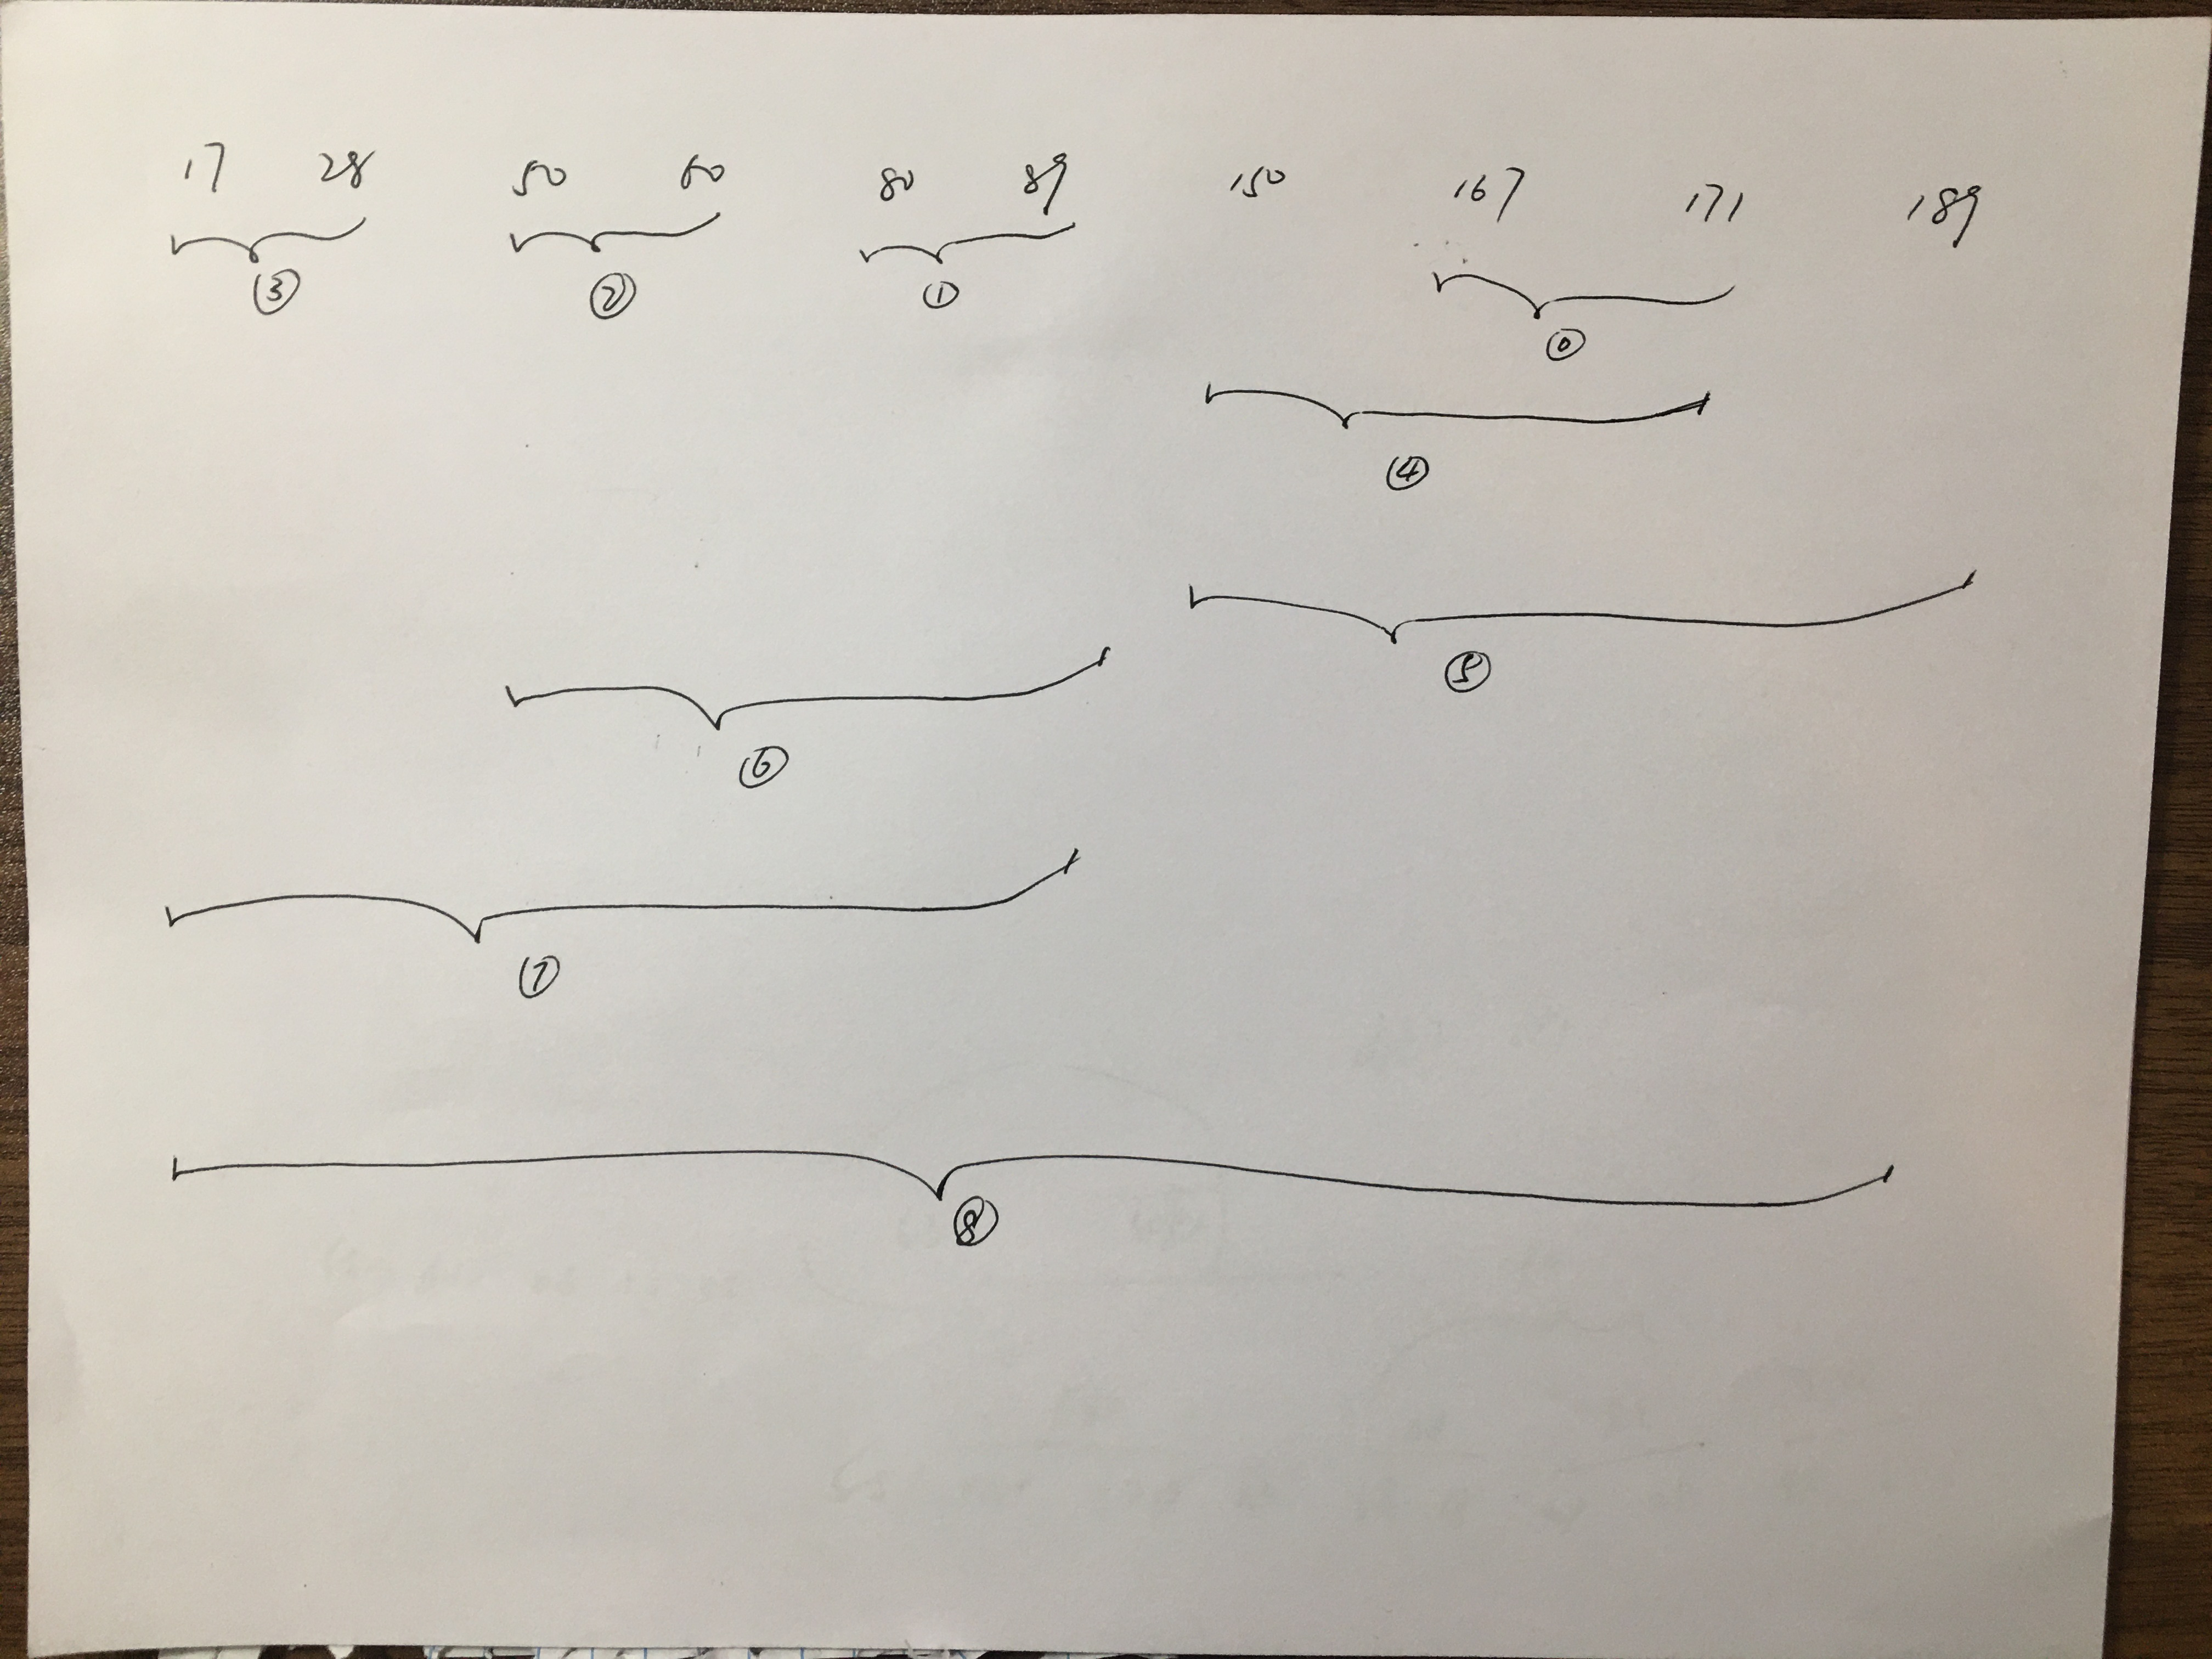

# 5. Use hierarchical agglomerative clustering with complete linkage to cluster the data.

In [ ]:
data = np.array([17, 28, 50, 60, 80, 89, 150, 167, 171, 189])
c={}
proximity={}

for i in data:
  proximity[i] = abs(data-i)
proximity_matrix=pd.DataFrame.from_dict(proximity, orient='index', columns=data)
complete_link=np.triu(proximity_matrix,k=0)
print(complete_link)

# convert data to string type, so that concatenating numbers will not exceed range
data_str=data.astype(str)

for j in range(len(data_str)):
  # when there is only one element left in the data list, stop the iteration
  if len(complete_link)>1:
    # get index of minimum value in distance matrix
    minval = np.min(complete_link[np.nonzero(complete_link)])
    index=np.argwhere(complete_link == minval)
    print(index)
    # update list
    a=np.delete(data_str,index[0])
    a=np.insert(a, index[0][0], data_str[index[0][0]]+data_str[index[0][1]])
    print("Updated list: ", a)
    # update cluster
    c[j]=data_str[index[0]].tolist()
    print("Hierarchical Clustering ", c)
    # update complete link distance matrix
    complete_link=np.delete(complete_link, index[0][0], 1)
    complete_link=np.delete(complete_link, index[0][1], 0)
    complete_link[index[0][0]][index[0][0]]=0
    print("Complete Link Distance matrix: ")
    print(complete_link)
    # assign updated list to variable data
    data_str=a
  else:
    break

[[  0  11  33  43  63  72 133 150 154 172]
 [  0   0  22  32  52  61 122 139 143 161]
 [  0   0   0  10  30  39 100 117 121 139]
 [  0   0   0   0  20  29  90 107 111 129]
 [  0   0   0   0   0   9  70  87  91 109]
 [  0   0   0   0   0   0  61  78  82 100]
 [  0   0   0   0   0   0   0  17  21  39]
 [  0   0   0   0   0   0   0   0   4  22]
 [  0   0   0   0   0   0   0   0   0  18]
 [  0   0   0   0   0   0   0   0   0   0]]
[[7 8]]
Updated list:  ['17' '28' '50' '60' '80' '89' '150' '167171' '189']
Hierarchical Clustering  {0: ['167', '171']}
Complete Link Distance matrix: 
[[  0  11  33  43  63  72 133 154 172]
 [  0   0  22  32  52  61 122 143 161]
 [  0   0   0  10  30  39 100 121 139]
 [  0   0   0   0  20  29  90 111 129]
 [  0   0   0   0   0   9  70  91 109]
 [  0   0   0   0   0   0  61  82 100]
 [  0   0   0   0   0   0   0  21  39]
 [  0   0   0   0   0   0   0   0  22]
 [  0   0   0   0   0   0   0   0   0]]
[[4 5]]
Updated list:  ['17' '28' '50' '60' '8089' '150' '167171

Based on the result above:

{0: ['167', '171'], 1: ['80', '89'], 2: ['50', '60'], 3: ['17', '28'], 4: ['150', '167171'], *5: ['5060', '8089'], 6: ['150167171', '189']*, 7: ['1728', '50608089'], 8: ['172850608089', '150167171189']}

The cluster diagram can be drawn:

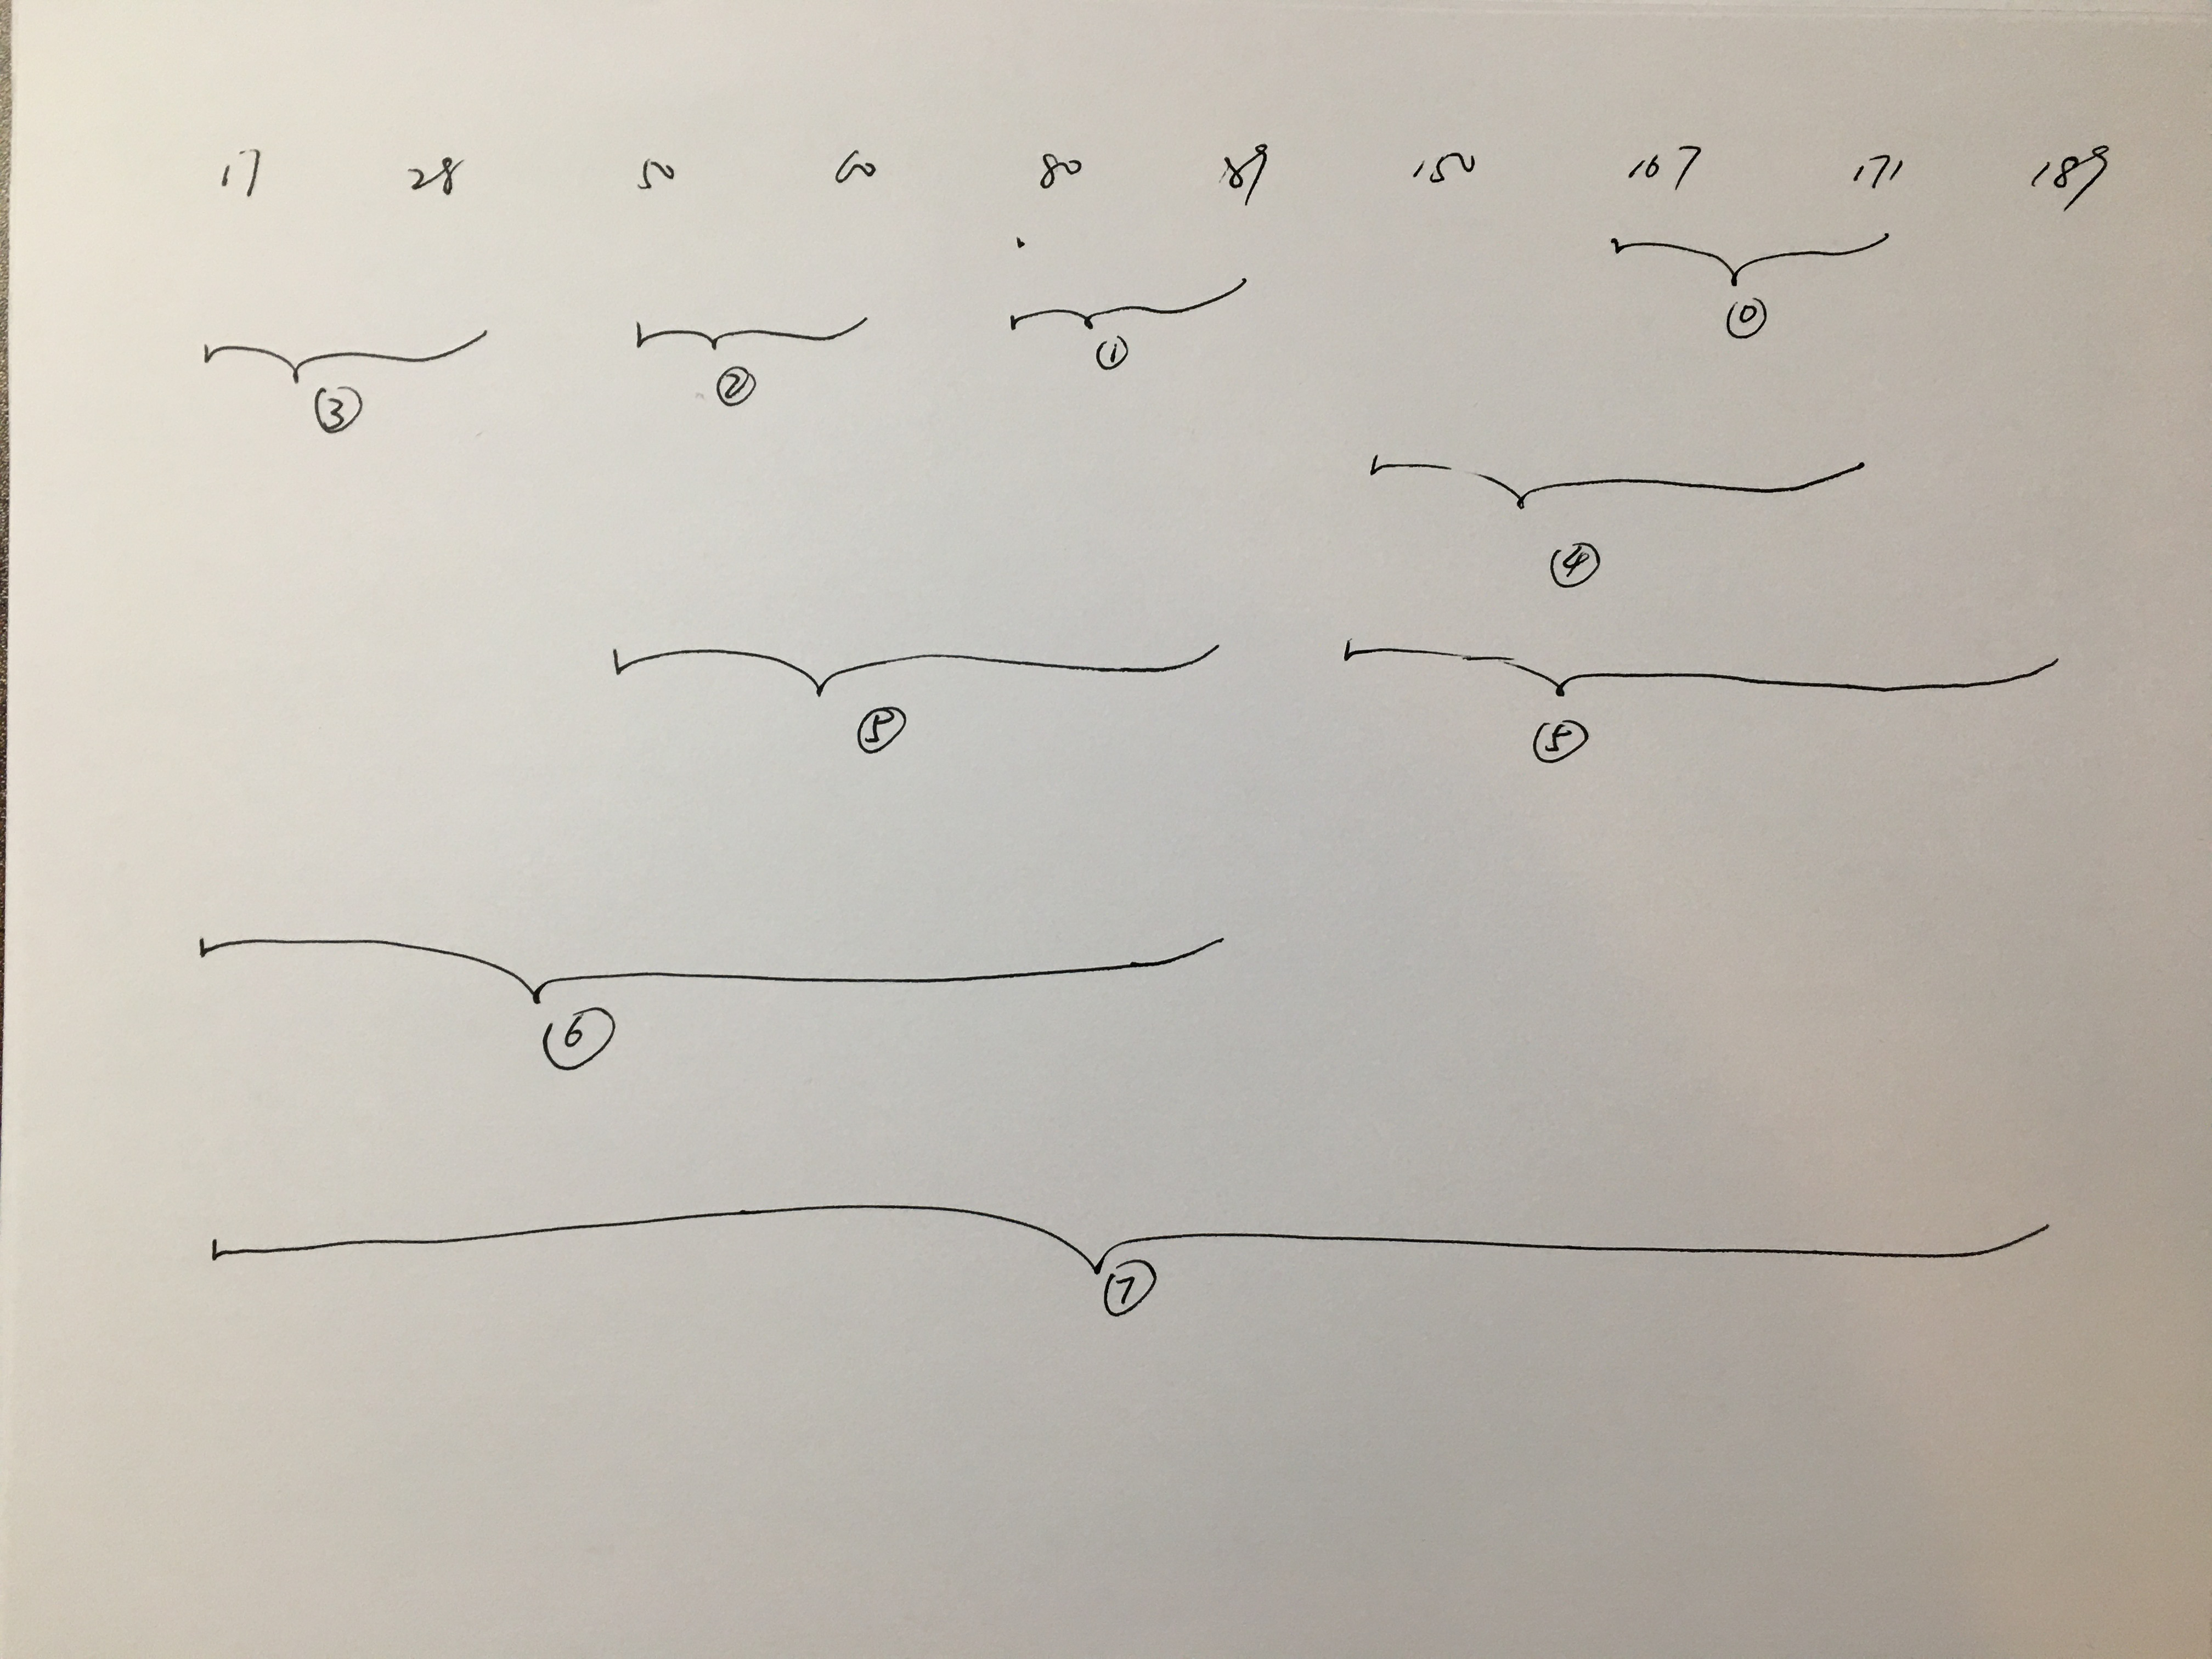

# Summary

The differences between Single Link and Complete Link in this case:

With single link, cluster 150167171 merges with 189 prior than cluster 5060 merges with 8090. While with complete link, these two merge at the same time.